In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler("color", ["royalblue", "mediumseagreen", "gold", "orange", "tomato", "hotpink", "mediumorchid"])

In [72]:
# Parámetros comunes

# ---

# Iteraciones temporales
it_t = 2000
# Parámetros de la discretización
dt = 0.1
dx = 0.5
alfa = 0.1
N = 100
# Estabilidad
s = alfa * (dt/dx**2)
print(f"Estabilidad: {s:.4f}")

Estabilidad: 0.0400


### FTCS : Forward in time, centered in space

$$
s = \alpha \cdot \frac{dt}{dx^2}
$$

$$
T_i^{n+1} = T_i^n + s (T_{i-1}^n - 2T_i^n + T_{i+1}^n)
$$

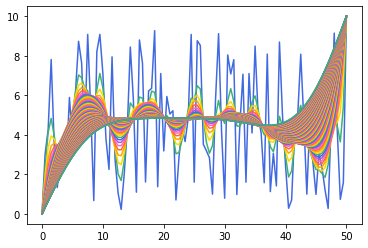

In [79]:
# Condiciones iniciales
T = np.random.uniform(0, 10, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# FTCS
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = T[1:N] + s * (T[0:N-1] - 2 * T[1:N] + T[2:N+1])

    # Foco en movimiento
    # T[N] = np.sin(0.5 * i) * 5 + 5

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Tres niveles temporales, centrado en el espacio

$$
T_j^{n+1} = \frac{2s}{3} (T_{i+1}^n - 2T_i^n + T_{i+1}^n) - \frac{1}{3} T_i^{n-1} + \frac{4}{3} T_i^n
$$

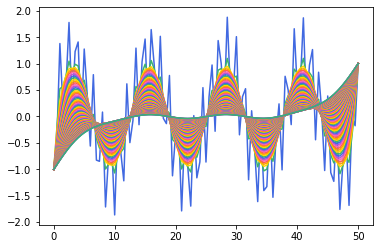

In [88]:
# Condiciones iniciales
T = np.sin(np.linspace(0, N/4, N+1)) + np.sin(np.linspace(0, N*4, N+1))

# Condiciones de frontera
cf = (-1, 1)
T[0], T[N] = cf

# Copia del vector temporal, siempre una iteración por detrás
Told = T.copy()

# Tres niveles temporales, centrado en el espacio
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = (2/3) * s * (T[0:N-1] - 2 * T[1:N] + T[2:N+1]) - (1/3) * Told[1:N] + (4/3) * T[1:N]
    Told = T.copy()

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Dos niveles temporales, centrado en el espacio (5 vecinos)

$$
T_i^{n+1} = T_i^n + s (-\frac{1}{12} T_{i-2}^n +\frac{4}{3} T_{i-1}^n -\frac{5}{2} T_{i}^n +\frac{4}{3} T_{i+1}^n -\frac{1}{12} T_{i+2}^n)
$$

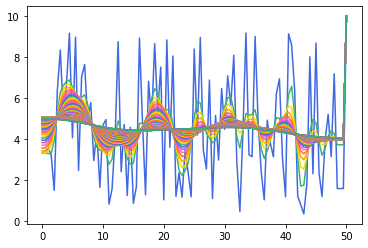

In [103]:
# Condiciones iniciales
T = np.random.uniform(0, 10, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# Extendemos el vector hacia los dos extremos
T = np.concatenate(([T[0]], T, [T[N]]))

# 5 vecinos
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[2:-2] = T[2:-2] + s * (- (1/12) * T[:-4] + (4/3) * T[1:-3] - (5/2) * T[2:-2] + (4/3) * T[3:-1] - (1/12) * T[4:])

    # Condiones de frontera con flujo nulo
    #T[1], T[N-1] = T[2], T[N-2]
    #T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T[1:-1])

### DuFort-Frankel (Tres niveles temporales, centrado en el espacio)

$$
T_i^{n+1} = \frac{2s}{1+2s} (T_{i-1}^n + T_{i+1}^n) + \frac{1-2s}{1+2s} T_i^{n-1}
$$

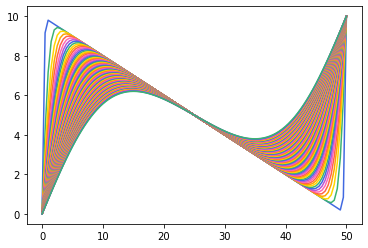

In [108]:
# Condiciones iniciales
T = np.linspace(10, 0, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# Copia del vector temporal, siempre una iteración por detrás
Told = T.copy()

# DuFort-Frankel
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = (2*s)/(1+2*s) * (T[0:N-1] + T[2:N+1]) + (1-2*s)/(1+2*s) * Told[1:N]
    Told = T.copy()

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)